In [1]:
!pip install allantools

# Try using AllanTools to produce the white noise and then do the ADEV again

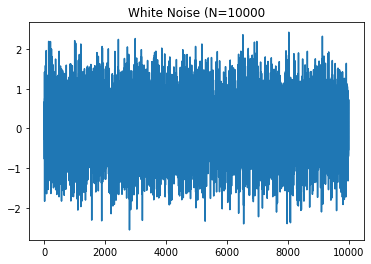

In [2]:
import allantools
import matplotlib.pyplot as plt
import numpy as np

#there doesn't seem to be a way to seed the white noise
numSamples = 10**4
noise = allantools.noise.white(num_points=numSamples)

#plot the white noise sequence
plt.plot(np.arange(0, len(noise)), noise)
plt.title(f"White Noise (N={numSamples}")
plt.show();

In [3]:
#check the generated white noise statistics
import pandas as pd
noise_series = pd.Series(data=noise)
noise_series.describe()

count    10000.000000
mean         0.006307
std          0.712153
min         -2.560683
25%         -0.476327
50%          0.005144
75%          0.487827
max          2.427198
dtype: float64

In [4]:
#could the problem be that the taus are all powers of 2
#matlab code taus are 1, 2, 3...
(taus2, adev, _, n) = allantools.adev(data=noise, taus="all")
print(f"Taus:  {taus2}")
print(f"ADEV:  {adev}")
print(f"n:  {n}")

Taus:  [1.000e+00 2.000e+00 3.000e+00 ... 3.331e+03 3.332e+03 3.333e+03]
ADEV:  [1.23277320e+00 6.18183508e-01 4.09743688e-01 ... 2.66403124e-04
 1.37391206e-04 1.24971095e-04]
n:  [9.998e+03 4.998e+03 3.332e+03 ... 2.000e+00 2.000e+00 2.000e+00]


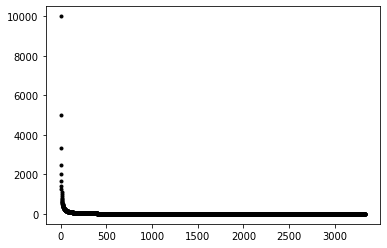

In [59]:
idx = np.arange(0, len(n), 1)
plt.plot(idx, n, 'k.')
plt.show();

In [5]:
len(n)==len(taus2)

True

In [36]:
ns = pd.DataFrame({"n":n})

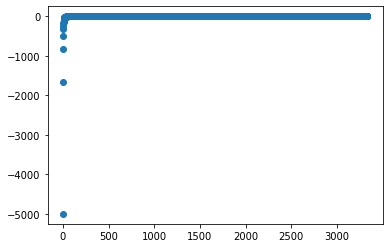

In [56]:
plt.scatter(np.arange(0, len(ns)-1, 1), np.diff(ns["n"]))

In [38]:
ns.head()

,n
0,9998.0
1,4998.0
2,3332.0
3,2498.0
4,1998.0


In [39]:
ns.tail()

,n
3328,2.0
3329,2.0
3330,2.0
3331,2.0
3332,2.0


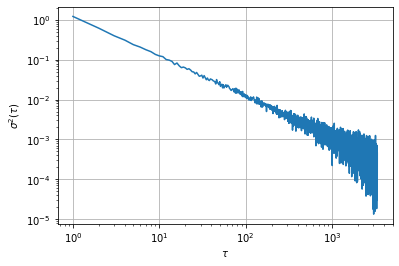

In [46]:
plt.loglog(taus2, adev)
plt.xlabel("$\\tau$")
plt.ylabel("$\sigma^{2}(\\tau)$")
plt.grid(b=True)
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


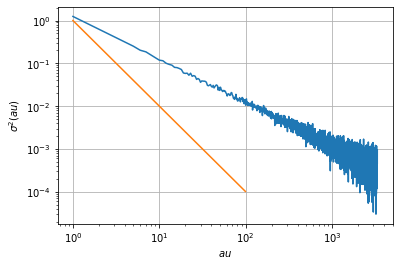

In [ ]:
x = np.arange(0, 100)
y = 1/x**2
plt.loglog(taus2, adev)
plt.loglog(x, y)
plt.xlabel("$\tau$")
plt.ylabel("$\sigma^{2}(\tau)$")
plt.grid(b=True)
plt.show();

## UPDATE:
Using allan tools to generate the white noise gives a flatter slope than before.
However, I do not like the statistics of the sampled sequence (not close enough to mean 0 std 1 as i'd like it)
Next, i'll check what happens when i take `taus2` to `log2(taus2)`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


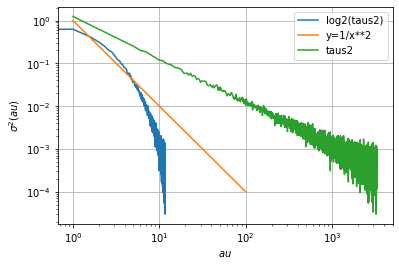

In [ ]:
#take the log base 2 of each of the taus and repeat the process above
log_taus2 = np.log2(taus2)
log_taus2

x = np.arange(0, 100)
y = 1/x**2
plt.loglog(log_taus2, adev, label="log2(taus2)")
plt.loglog(x, y, label="y=1/x**2")
plt.loglog(taus2, adev, label="taus2")

plt.legend()
plt.xlabel("$\tau$")
plt.ylabel("$\sigma^{2}(\tau)$")
plt.grid(b=True)
plt.show();

## UPDATE:
I don't think the problem is that the taus are powers of 2
After "undoing" the power of 2 (aka taking a log) the resulting allan deviation does not match the expected shape for any allan deviation.

The next thing to try is using the standard `taus2` and change the sampling frequency

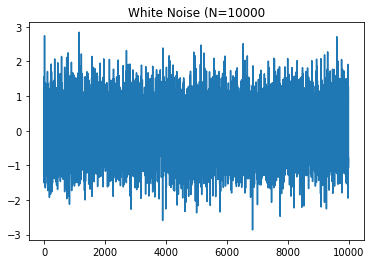

In [ ]:
noise_fs_1kHz = allantools.noise.white(num_points=numSamples, fs=1000)
#plot the white noise sequence (Fs=1000)
plt.plot(np.arange(0, len(noise)), noise)
plt.title(f"White Noise (N={numSamples}")
plt.show();

In [ ]:
pd.Series(data=noise_fs_1kHz).describe()

count    10000.000000
mean        -0.078371
std         22.409539
min        -86.435706
25%        -15.317899
50%          0.051679
75%         15.385193
max         89.632964
dtype: float64

I did not expect to see the standard deivation spread out like that. Compared to before, the std for `fs=1000` is ~30 times larger

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in power
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


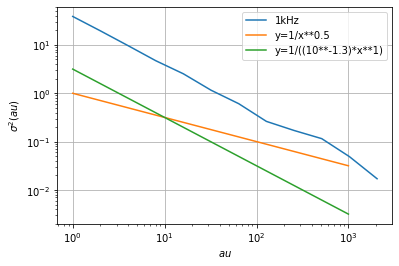

In [ ]:
(taus2, adev, _, _) = allantools.adev(data=noise_fs_1kHz)

x = np.arange(0, 1000)
y = x**-0.5
y1 = 1/(x**2)
y2 = (1/((10**-0.5)*x**1))
plt.loglog(taus2, adev, label="1kHz")
plt.loglog(x, y, label="y=1/x**0.5")
#plt.loglog(x, y1, label="y=1/x**2")
plt.loglog(x, y2, label="y=1/((10**-1.3)*x**1)")

plt.legend()
plt.xlabel("$\tau$")
plt.ylabel("$\sigma^{2}(\tau)$")
plt.grid(b=True)
plt.show();

#UPDATE: 
The graph above is showing that the slope of the 1kHz white noise sequence is -1. So, *quantisation* error is overpowering the white noise error.

The next thing to do is check the slope for the white noise sequence generated by `random`.

# Checking $\nabla=-1$ using seeded, white noise

In [ ]:
from random import gauss
from random import seed
from pandas import Series 
from pandas.plotting import autocorrelation_plot

In [ ]:
seed(1)

In [ ]:
values = [gauss(0.0, 1.0) for i in range(0, 1000)]
series = Series(data=values)

In [ ]:
series.describe()

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64

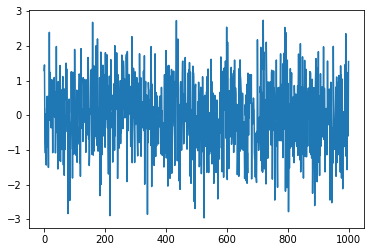

In [ ]:
series.plot()

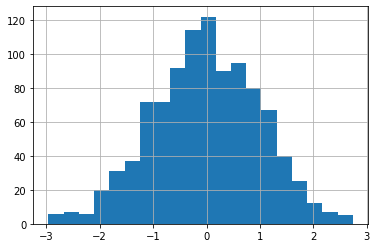

In [ ]:
series.hist(bins=20)

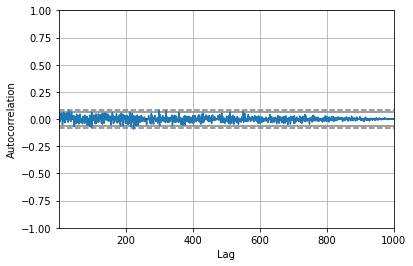

In [ ]:
autocorrelation_plot(series=series)

In [ ]:
import matplotlib.pyplot as plt
from allantools import adev
import numpy as np

In [ ]:
sigma = adev(data=series[:-1], data_type="phase")

In [ ]:
taus2, adev = (sigma[0], sigma[1])
taus2, adev

(array([  1.,   2.,   4.,   8.,  16.,  32.,  64., 128., 256.]),
 array([1.73457471, 0.8662126 , 0.443739  , 0.21212117, 0.10978088,
        0.0421397 , 0.03256492, 0.00873955, 0.00311026]))

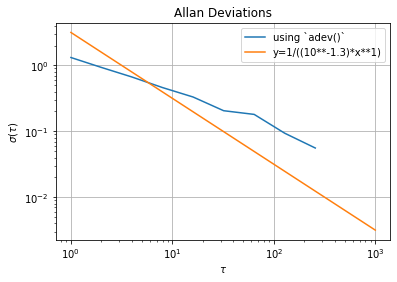

In [ ]:
plt.loglog(taus2, np.sqrt(adev), label="using `adev()`")
plt.loglog(x, y2, label="y=1/((10**-1.3)*x**1)")

plt.legend()
plt.title("Allan Deviations")
plt.xlabel(r"$\tau$")
plt.ylabel(r"$\sigma(\tau)$")
plt.grid(b=True)
plt.show()

# UPDATE:
From the above plot, it looks like quantisation error once again.

This is good because it means I can seed the noise samples using other packages (like `random`).

Notice, too, that the sampling rate for the above sequence is Fs=1. So I think this result means that motivation for changing the sampling rate is to simulate real IMUs; not to "fix" the ADEV.

# Old experiments

In [ ]:
slope = -0.5
logtau = np.log(taus2)
logadev = np.log(adev)
dlogadev = np.diff(logadev)/np.diff(logtau)

In [ ]:
i = min(np.abs(dlogadev-slope))

In [ ]:
b = logadev[0] - slope*logtau[0]

In [ ]:
b

0.550762259817135

In [ ]:
logN = slope*np.log(1) + b
logN

0.550762259817135

In [ ]:
N = 10**logN
N

3.5543669321456166

In [ ]:
N = logadev[0]

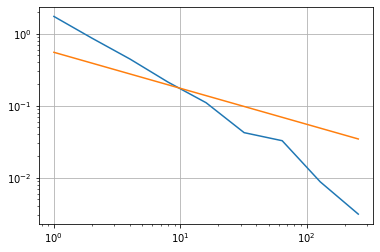

In [ ]:
lineN = N/np.sqrt(taus2)
plt.loglog(taus2, adev)
plt.loglog(taus2, lineN)
plt.grid(b=True)
plt.show()

In [ ]:
len(lineN)

9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


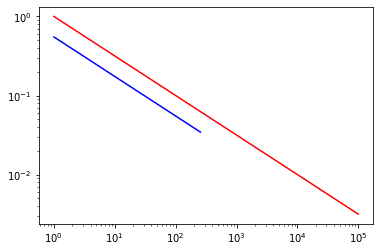

In [ ]:
x = np.arange(0, 100000)
y = 1/np.sqrt(x)
plt.loglog(x, y, 'r')
plt.loglog(taus2, lineN, 'b')
plt.show()

# Translate MATLAB code, I don't trust the AllanTools

In [ ]:
#~~assume Fs==1~~ (Incorrect)
#t0==1/Fs
t0=1/100

In [ ]:
#assume that the logged samples are just a white noise series
theta = np.cumsum(series, 0)

In [ ]:
maxNumM = 100
#get the number of rows in theta
L = theta.shape[0]
#maxM = 2**(np.floor(np.log2(L/2)))
maxM = np.power(2, np.floor(np.log2(L/2)))
#0 to 256 with log spacing
m = np.transpose(np.logspace(np.log10(1), np.log10(maxM), int(maxM)))
m = np.ceil(m)
m = np.unique(m)
m = m.astype("int32")
m.shape

(125,)

In [ ]:
tau = m*t0
tau

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56,
       0.58, 0.59, 0.6 , 0.61, 0.63, 0.64, 0.66, 0.67, 0.68, 0.7 , 0.71,
       0.73, 0.75, 0.76, 0.78, 0.8 , 0.81, 0.83, 0.85, 0.87, 0.89, 0.91,
       0.93, 0.95, 0.97, 0.99, 1.01, 1.03, 1.05, 1.08, 1.1 , 1.13, 1.15,
       1.18, 1.2 , 1.23, 1.25, 1.28, 1.31, 1.34, 1.37, 1.4 , 1.43, 1.46,
       1.49, 1.52, 1.56, 1.59, 1.63, 1.66, 1.7 , 1.74, 1.77, 1.81, 1.85,
       1.89, 1.93, 1.98, 2.02, 2.06, 2.11, 2.16, 2.2 , 2.25, 2.3 , 2.35,
       2.4 , 2.46, 2.51, 2.56])

In [ ]:
#avar = np.zeros((len(m), 1))

#for i in range(0, len(m)):
#    mi = m[i]
    #avar[i,:] = np.sum((theta[0+2*mi:L] - 2*theta[0+mi:L-mi] + theta[0:L-2*mi])**2)
    #avar[i,:] = np.sum(np.power((theta[0+2*mi:L] - 2*theta[0+mi:L-mi] + theta[0:L-2*mi]), 2))

In [ ]:
avar = np.zeros((len(m), 1))

for i in range(1, len(L-2*m)):
    mi = m[i]
    avar[i,:] = np.sum((theta[0+2*mi:L] - 2*theta[0+mi:L-mi] + theta[0:L-2*mi])**2)

In [ ]:
def kernel(x):
    return (theta[0+2*x:L] - 2*theta[0+x:L-mi] + theta[0:L-2*x])

x = np.arange(0, 1000)
y = kernel(x)
plt.plot(x, y);
plt.show()

TypeError: ignored

In [ ]:
avar

In [ ]:
#avar = avar/(2*(tau**2)*(L-2*m))

In [ ]:
adev = np.sqrt(avar)

In [ ]:
plt.loglog(tau, adev)
plt.show()

In [ ]:
tau.shape

In [ ]:
adev.shape

In [ ]:
adev